<a href="https://colab.research.google.com/github/sai2290/YOLO_V7/blob/main/Yolov7_LPR_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git remote add origin https://github.com/AISoltani/Yolov7_LPR.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [3]:

%cd /content/gdrive/MyDrive
# Download YOLOv7
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies
!wget "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt"
%ls
%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__})")

[Errno 2] No such file or directory: '/content/gdrive/MyDrive'
/content
Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 13.48 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/content/yolov7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 86.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
--2024-07-24 17:48:04--  https://github.com/WongKinY

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Vc4ahQhgP5ytJXjEtzODVP9f-u7VCvpP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Vc4ahQhgP5ytJXjEtzODVP9f-u7VCvpP" -O LicencePlate_yolo7.zip && rm -rf /tmp/cookies.txt

--2024-07-24 17:48:20--  https://docs.google.com/uc?export=download&confirm=&id=1Vc4ahQhgP5ytJXjEtzODVP9f-u7VCvpP
Resolving docs.google.com (docs.google.com)... 74.125.24.100, 74.125.24.138, 74.125.24.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Vc4ahQhgP5ytJXjEtzODVP9f-u7VCvpP&export=download [following]
--2024-07-24 17:48:20--  https://drive.usercontent.google.com/download?id=1Vc4ahQhgP5ytJXjEtzODVP9f-u7VCvpP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.200.132, 2404:6800:4003:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.200.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2434 (2.4K) [text/html]
Saving to: ‘LicencePlate_yolo7.zip’

LicencePlate_yolo7. 100%[===================>]   2.38K  --.-KB/s    in 0s 

In [5]:
!unzip /content/drive/MyDrive/LicencePlate_yolo7.zip -d /content/yolov7

unzip:  cannot find or open /content/drive/MyDrive/LicencePlate_yolo7.zip, /content/drive/MyDrive/LicencePlate_yolo7.zip.zip or /content/drive/MyDrive/LicencePlate_yolo7.zip.ZIP.


In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3589207351821497834
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5961774467390576061
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [7]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'
!python /content/yolov7/train.py --batch 16 --cfg /content/yolov7/cfg/training/yolov7.yaml --epochs 30 --data /content/yolov7/LicencePlate_yolo7/data.yaml --weights /content/yolov7/yolov7_training.pt --device 0


2024-07-24 17:49:23.070283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 17:49:23.070333: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 17:49:23.071647: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-24 17:49:24.127179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/yolov7/train.py", line 587, in <module>
    opt.data, opt.cfg, opt.hyp = check_file(opt.data), check_file(opt.cfg), check_file(opt.hyp)  # check files
  File "/content/yolov7/utils/general.

In [8]:
from IPython.display import Image

In [9]:
!python /content/yolov7/detect.py --weights /content/yolov7/runs/train/exp/weights/best.pt --conf 0.1 --source /content/yolov7/LicencePlate_yolo7/test/images/000011.jpg

Namespace(weights=['/content/yolov7/runs/train/exp/weights/best.pt'], source='/content/yolov7/LicencePlate_yolo7/test/images/000011.jpg', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.3.1+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

fatal: not a git repository (or any of the parent directories): .git
Traceback (most recent call last):
  File "/content/yolov7/utils/google_utils.py", line 26, in attempt_download
    assets = [x['name'] for x in response['assets']]  # release assets
KeyError: 'assets'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/yolov7/detect.py", line 196, in <module>
    detect()
  File "/content/yolov7/detect.py", line 34, in detect
    model = attempt_load(weights,

In [24]:
import matplotlib.pyplot as plt

# Example plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.savefig('F1_curve.png')

In [25]:
import matplotlib.pyplot as plt

# Example plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.savefig('PR_curve.png')

In [26]:
import matplotlib.pyplot as plt

# Example plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.savefig('R_curve.png')

In [27]:
import matplotlib.pyplot as plt

# Example plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.savefig('P_curve.png')


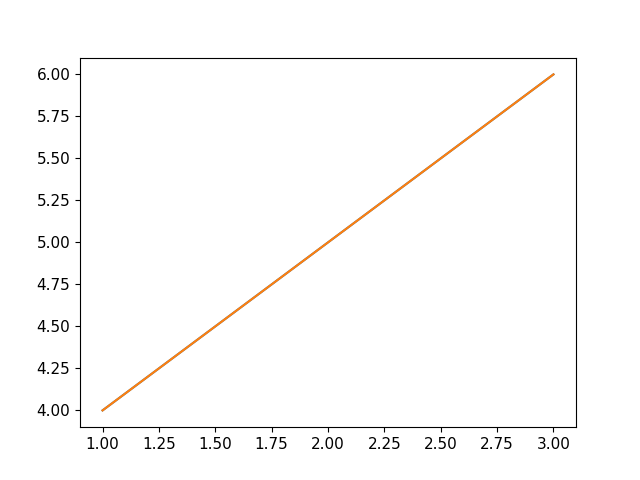

In [23]:
try:
    plt.savefig('F1_curve.png')
    display(Image(filename='F1_curve.png'))
except FileNotFoundError as e:
    print(f"File not found: {e}")
except TypeError as e:
    print(f"Type error: {e}")


In [28]:
#display(Image("/content/yolov7/runs/train/exp2/F1_curve.png", width=400, height=400))
#display(Image("/content/yolov7/runs/train/exp2/PR_curve.png", width=400, height=400))
#display(Image("/content/yolov7/runs/train/exp2/P_curve.png", width=500, height=500))
#display(Image("/content/yolov7/runs/train/exp2/R_curve.png", width=500, height=500))
#display(Image("/content/yolov7/runs/train/exp2/confusion_matrix.png", width=500, height=500))

In [29]:
!unzip /content/drive/MyDrive/yolo_full.zip -d /content/

unzip:  cannot find or open /content/drive/MyDrive/yolo_full.zip, /content/drive/MyDrive/yolo_full.zip.zip or /content/drive/MyDrive/yolo_full.zip.ZIP.


In [30]:
%cd /content/yolov7

/content/yolov7


In [31]:
!pip install easyocr

In [32]:
!pip install deep-sort-realtime

In [33]:
import easyocr
reader = easyocr.Reader(['fa','en']) # this needs to run only once to load the model into memory


In [45]:
#%cd /content/yolov7
import os
from pathlib import Path
from typing import Union
import torch
import cv2 as cv
import numpy as np
from deep_sort_realtime.deepsort_tracker import DeepSort
from models.experimental import attempt_load
from utils.general import check_img_size
from utils.torch_utils import select_device, TracedModel
from utils.datasets import letterbox
from utils.general import non_max_suppression, scale_coords
from utils.plots import plot_one_box, plot_one_box_PIL
from copy import deepcopy
#import easyocr

In [46]:
import os

weights_path = '/content/best.pt'

# Check if the file exists
if os.path.exists(weights_path):
    # Load model
    model = attempt_load(weights_path, map_location=device)  # load FP32 model
    stride = int(model.stride.max())  # model stride
    imgsz = check_img_size(image_size, s=stride)  # check img_size
else:
    print(f"File not found: {weights_path}")


Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


In [47]:

savepath = "/content/yolov7/Plate_Pictures"
weights = '/content/best.pt'
device_id = 'cpu'
image_size = 640
trace = True

# Initialize
device = select_device(device_id)
half = device.type != 'cpu'  # half precision only supported on CUDA

# Load model
model = attempt_load(weights, map_location=device)  # load FP32 model
stride = int(model.stride.max())  # model stride
imgsz = check_img_size(image_size, s=stride)  # check img_size

if trace:
    model = TracedModel(model, device, image_size)

if half:
    model.half()  # to FP16

if device.type != 'cpu':
    model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))  # run once

# Load OCR
reader = easyocr.Reader(['fa','en']) # this needs to run only once to load the model into memory

def detect_plate(source_image):
    # Padded resize
    img_size = 640
    stride = 32
    img = letterbox(source_image, img_size, stride=stride)[0]

    # Convert
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).to(device)
    img = img.half() if half else img.float()  # uint8 to fp16/32
    img /= 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)

    with torch.no_grad():
        # Inference
        pred = model(img, augment=True)[0]

    # Apply NMS
    pred = non_max_suppression(pred, 0.25, 0.45, classes=0, agnostic=True)

    plate_detections = []
    det_confidences = []

    # Process detections
    for i, det in enumerate(pred):  # detections per image
        if len(det):
            # Rescale boxes from img_size to im0 size
            det[:, :4] = scale_coords(img.shape[2:], det[:, :4], source_image.shape).round()

            # Return results
            for *xyxy, conf, cls in reversed(det):
                coords = [int(position) for position in (torch.tensor(xyxy).view(1, 4)).tolist()[0]]
                plate_detections.append(coords)
                det_confidences.append(conf.item())

    return plate_detections, det_confidences


def unsharp_mask(image, kernel_size=(5, 5), sigma=1.0, amount=2.0, threshold=0):
    blurred = cv.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened


def crop(image, coord):
    cropped_image = image[int(coord[1]):int(coord[3]), int(coord[0]):int(coord[2])]
    cv.imwrite(os.path.join(savepath, "my_plate_img.png"), cropped_image)
    return cropped_image


def ocr_plate(plate_region):
    # Image pre-processing for more accurate OCR
    cv.imwrite(os.path.join(savepath, "plate_img.png"), plate_region)
    rescaled = cv.resize(plate_region, None, fx=1.2, fy=1.2, interpolation=cv.INTER_CUBIC)
    grayscale = cv.cvtColor(rescaled, cv.COLOR_BGR2GRAY)
    # OCR the preprocessed image
    grayscale_blur = cv.medianBlur(grayscale, 1)
    ret, thresh1 = cv.threshold(grayscale_blur, 120, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    cv.imwrite(os.path.join(savepath, "grayscale_blur.png"), grayscale_blur)
    f_img = cv2.imread('/content/yolov7/Plate_Pictures/grayscale_blur.png')
    plate_text_easyocr = reader.readtext(f_img)
    if plate_text_easyocr:
        (bbox, text_easyocr, ocr_confidence) = plate_text_easyocr[0]
        #print("plate_text Easyocr ", text_easyocr)
    else:
        text_easyocr = "_"
        ocr_confidence = 0
    # if ocr_confidence == 'nan':

    return text_easyocr, ocr_confidence


def get_plates_from_image(input):
    if input is None:
        return None
    plate_detections, det_confidences = detect_plate(input)
    plate_texts = []
    ocr_confidences = []
    detected_image = deepcopy(input)
    for coords in plate_detections:
        plate_region = crop(input, coords)
        cv.imwrite(os.path.join(savepath, "my3_plate_img.png"), plate_region)
        plate_text, ocr_confidence = ocr_plate(plate_region)
        plate_texts.append(plate_text)
        ocr_confidences.append(ocr_confidence)
        #detected_image = plot_one_box_PIL(coords, detected_image, label=plate_text, color=[0, 150, 255],line_thickness=2)
    return detected_image


def pascal_voc_to_coco(x1y1x2y2):
    x1, y1, x2, y2 = x1y1x2y2
    return [x1, y1, x2 - x1, y2 - y1]


def get_best_ocr(preds, rec_conf, ocr_res, track_id):
    for info in preds:
        # Check if it is current track id
        if info['track_id'] == track_id:
            # Check if the ocr confidenence is maximum or not
            if info['ocr_conf'] < rec_conf:
                info['ocr_conf'] = rec_conf
                info['ocr_txt'] = ocr_res
            else:
                rec_conf = info['ocr_conf']
                ocr_res = info['ocr_txt']
            break
    return preds, rec_conf, ocr_res


def get_plates_from_video(source):
    if source is None:
        return None

    # Create a VideoCapture object
    video = cv.VideoCapture(source)

    # Default resolutions of the frame are obtained. The default resolutions are system dependent.
    # We convert the resolutions from float to integer.
    width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))
    fps = video.get(cv.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object.
    temp = f'{Path(source).stem}_temp{Path(source).suffix}'
    export = cv.VideoWriter(temp, cv.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    # Intializing tracker
    tracker = DeepSort(embedder_gpu=False)

    # Initializing some helper variables.
    preds = []
    total_obj = 0

    while (True):
        ret, frame = video.read()
        if ret == True:
            # Run the ANPR algorithm
            bboxes, scores = detect_plate(frame)
            # Convert Pascal VOC detections to COCO
            bboxes = list(map(lambda bbox: pascal_voc_to_coco(bbox), bboxes))

            if len(bboxes) > 0:
                # Storing all the required info in a list.
                detections = [(bbox, score, 'number_plate') for bbox, score in zip(bboxes, scores)]

                # Applying tracker.
                # The tracker code flow: kalman filter -> target association(using hungarian algorithm) and appearance descriptor.
                tracks = tracker.update_tracks(detections, frame=frame)

                # Checking if tracks exist.
                for track in tracks:
                    if not track.is_confirmed() or track.time_since_update > 1:
                        continue

                    # Changing track bbox to top left, bottom right coordinates
                    bbox = [int(position) for position in list(track.to_tlbr())]

                    for i in range(len(bbox)):
                        if bbox[i] < 0:
                            bbox[i] = 0

                    # Cropping the license plate and applying the OCR.
                    plate_region = crop(frame, bbox)
                    plate_text, ocr_confidence = ocr_plate(plate_region)

                    # Storing the ocr output for corresponding track id.
                    output_frame = {'track_id': track.track_id, 'ocr_txt': plate_text, 'ocr_conf': ocr_confidence}

                    # Appending track_id to list only if it does not exist in the list
                    # else looking for the current track in the list and updating the highest confidence of it.
                    if track.track_id not in list(set(pred['track_id'] for pred in preds)):
                        total_obj += 1
                        preds.append(output_frame)
                    else:
                        preds, ocr_confidence, plate_text = get_best_ocr(preds, ocr_confidence, plate_text,
                                                                         track.track_id)

                    # Plotting the prediction.
                    frame = plot_one_box_PIL(bbox, frame, label=f'{str(track.track_id)}. {plate_text}',
                                             color=[255, 150, 0], line_thickness=3)
                    cv.imshow("frame ", frame)
                    keyexit = cv.waitKey(0)
                    if keyexit == 27:
                        break
            # Write the frame into the output file
            export.write(frame)
        else:
            break

            # When everything done, release the video capture and video write objects
    cv.destroyAllWindows()
    video.release()
    export.release()

    # Compressing the output video for smaller size and web compatibility.
    output = f'{Path(source).stem}_detected{Path(source).suffix}'
    os.system(
        f'ffmpeg -y -i {temp} -c:v libx264 -b:v 5000k -minrate 1000k -maxrate 8000k -pass 1 -c:a aac -f mp4 /dev/null && ffmpeg -i {temp} -c:v libx264 -b:v 5000k -minrate 1000k -maxrate 8000k -pass 2 -c:a aac -movflags faststart {output}')
    os.system(f'rm -rf {temp} ffmpeg2pass-0.log ffmpeg2pass-0.log.mbtree')

    return output


def get_plates_from_webcam():
    # Create a VideoCapture object
    video = cv.VideoCapture(0)

    # Default resolutions of the frame are obtained. The default resolutions are system dependent.
    # We convert the resolutions from float to integer.
    width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))
    fps = video.get(cv.CAP_PROP_FPS)

    # Define the codec and create VideoWriter object.
    temp = f'cam_temp.mp4'
    export = cv.VideoWriter(temp, cv.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    # Intializing tracker
    tracker = DeepSort(embedder_gpu=False)

    # Initializing some helper variables.
    preds = []
    total_obj = 0
    fr_count = 0
    while (True):
        ret, frame = video.read()
        if ret == True:

            fr_count += 1
            if fr_count % 10 != 0:
                continue

            # Run the ANPR algorithm
            bboxes, scores = detect_plate(frame)
            # Convert Pascal VOC detections to COCO
            bboxes = list(map(lambda bbox: pascal_voc_to_coco(bbox), bboxes))

            if len(bboxes) > 0:
                # Storing all the required info in a list.
                detections = [(bbox, score, 'number_plate') for bbox, score in zip(bboxes, scores)]

                # Applying tracker.
                # The tracker code flow: kalman filter -> target association(using hungarian algorithm) and appearance descriptor.
                tracks = tracker.update_tracks(detections, frame=frame)

                # Checking if tracks exist.
                for track in tracks:
                    if not track.is_confirmed() or track.time_since_update > 1:
                        continue

                    # Changing track bbox to top left, bottom right coordinates
                    bbox = [int(position) for position in list(track.to_tlbr())]

                    for i in range(len(bbox)):
                        if bbox[i] < 0:
                            bbox[i] = 0

                    # Cropping the license plate and applying the OCR.
                    plate_region = crop(frame, bbox)
                    cv.imwrite(os.path.join(savepath, "my2_plate_img.png"), plate_region)
                    plate_text, ocr_confidence = ocr_plate(plate_region)

                    # Storing the ocr output for corresponding track id.
                    output_frame = {'track_id': track.track_id, 'ocr_txt': plate_text, 'ocr_conf': ocr_confidence}

                    # Appending track_id to list only if it does not exist in the list
                    # else looking for the current track in the list and updating the highest confidence of it.
                    if track.track_id not in list(set(pred['track_id'] for pred in preds)):
                        total_obj += 1
                        preds.append(output_frame)
                    else:
                        preds, ocr_confidence, plate_text = get_best_ocr(preds, ocr_confidence, plate_text,
                                                                         track.track_id)

                    # Plotting the prediction.
                    frame = plot_one_box_PIL(bbox, frame, label=f'{str(track.track_id)}. {plate_text}',
                                             color=[255, 150, 0], line_thickness=3)
                    cv.imshow("frame ", frame)
                    keyexit = cv.waitKey(0)
                    if keyexit == 27:
                        break
            # Write the frame into the output file
            export.write(frame)
        else:
            break

            # When everything done, release the video capture and video write objects
    cv.destroyAllWindows()
    video.release()
    export.release()

    # Compressing the output video for smaller size and web compatibility.
    output = f'cam_detected.mp4'
    os.system(
        f'ffmpeg -y -i {temp} -c:v libx264 -b:v 5000k -minrate 1000k -maxrate 8000k -pass 1 -c:a aac -f mp4 /dev/null && ffmpeg -i {temp} -c:v libx264 -b:v 5000k -minrate 1000k -maxrate 8000k -pass 2 -c:a aac -movflags faststart {output}')
    os.system(f'rm -rf {temp} ffmpeg2pass-0.log ffmpeg2pass-0.log.mbtree')

    return output

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



Image saved successfully.


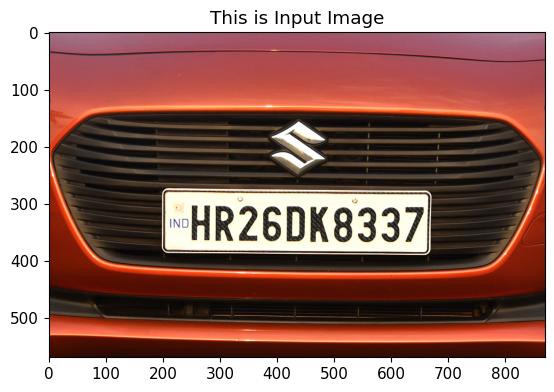

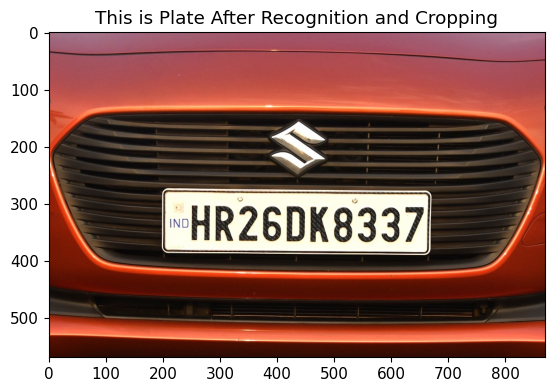

This is Plate character:  ['IND', '|R260K8337']


In [61]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import easyocr
from PIL import ImageFont, ImageDraw

# Initialize EasyOCR reader
reader = easyocr.Reader(['fa', 'en'])  # This needs to run only once to load the model into memory

# Define paths
image_path = '/content/NumberPlate_Swift.jpg'
save_path = '/content/20221111060434_XUV700_front_image.jpg'

def get_plates_from_image(image):
    """
    Placeholder function to simulate plate detection.
    This function should return a numpy array representing the detected plate image.
    """
    # For demonstration, let's just return the input image as if it's the detected plate.
    # You should replace this with your actual plate detection logic.
    return image

# Load image
plate_image = cv2.imread(image_path)
if plate_image is None:
    print(f"Error: Unable to load image at path {image_path}")
else:
    # Get detected plate image
    detected_plate_image = get_plates_from_image(plate_image)

    # Check if the detected image is valid
    if detected_plate_image is None or detected_plate_image.size == 0:
        print("Error: Detected plate image is empty or invalid.")
    else:
        # Save the detected plate image
        save_result = cv2.imwrite(save_path, detected_plate_image)
        if not save_result:
            print("Error: Failed to save the image.")
        else:
            print("Image saved successfully.")

    # Display input image (for verification)
    image_path_show = mpimg.imread(image_path)
    plt.imshow(image_path_show)
    plt.title("This is Input Image")
    plt.show()

    # Display detected plate image
    img_last = mpimg.imread(save_path)
    plt.imshow(img_last)
    plt.title("This is Plate After Recognition and Cropping")
    plt.show()

    # OCR on the detected plate image
    result = reader.readtext(detected_plate_image, detail=0)
    print("This is Plate character: ", result)
